In [ ]:
from google.colab import drive #google direve bağlantısı
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd #gerekli kütüphaneleri import ettik
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

In [ ]:
!pip install PyDrive

## **Veri Seti Özellikleri**

In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/Notebooks/Istanbul Weather Data.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Notebooks/weatherHistory.csv')

In [ ]:
data1.head(3)

,DateTime,Condition,Rain,MaxTemp,MinTemp,SunRise,SunSet,MoonRise,MoonSet,AvgWind,AvgHumidity,AvgPressure
0,02.09.2019,Partly cloudy,0.0,27,22,06:32:00,19:37:00,9:52:00,21:45:00,23,66,1012
1,01.09.2019,Partly cloudy,0.0,27,22,06:31:00,19:38:00,8:37:00,21:13:00,21,66,1011
2,31.08.2019,Patchy rain possible,0.5,26,22,06:30:00,19:40:00,7:21:00,20:40:00,22,63,1015


In [ ]:
data1 = data1.sort_index(ascending=False) #index'in sıralamasını tersine aldık
data1=data1.reset_index(drop=True)  #index'i sıfırladık ve eski sıralamayı dropladık
data1['DateTime'] =pd.to_datetime(data1['DateTime'])  #DateTime sütunundaki verileri, datetime formatına dönüştürdük
data1.head(3)

,DateTime,Condition,Rain,MaxTemp,MinTemp,SunRise,SunSet,MoonRise,MoonSet,AvgWind,AvgHumidity,AvgPressure
0,2009-01-01,Partly cloudy,0.23,5,2,08:29:00,17:47:00,11:9:00,22:39:00,10,90,1027
1,2009-02-01,Overcast,4.48,4,1,08:29:00,17:48:00,11:30:00,23:43:00,12,89,1021
2,2009-03-01,Overcast,0.08,5,3,08:29:00,17:48:00,11:52:00,NaN,16,94,1021


In [ ]:
data2.head(3)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.


In [ ]:
data1.isna().sum() #boş veri sayısını verir

DateTime         0
Condition        0
Rain             0
MaxTemp          0
MinTemp          0
SunRise          0
SunSet           0
MoonRise       132
MoonSet        131
AvgWind          0
AvgHumidity      0
AvgPressure      0
dtype: int64

In [ ]:
data2.isna().sum() #boş veri sayısını verir

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [ ]:
rf=data1['Condition'].unique() #Condition sütunundaki birbirinden tamamen farklı olan verileri inceledik
print(rf)

['Partly cloudy' 'Overcast' 'Mist' 'Cloudy' 'Sunny'
 'Thundery outbreaks possible' 'Fog' 'Light rain shower'
 'Moderate or heavy rain shower' 'Patchy rain possible'
 'Patchy light drizzle' 'Moderate rain' 'Light sleet'
 'Moderate or heavy snow showers' 'Torrential rain shower' 'Light drizzle'
 'Blizzard' 'Light rain' 'Light sleet showers' 'Heavy rain'
 'Moderate or heavy rain with thunder' 'Moderate snow'
 'Moderate or heavy sleet' 'Moderate rain at times'
 'Patchy light rain with thunder' 'Heavy rain at times']


In [ ]:
rf=data2['Summary'].unique() #Summary sütunundaki birbirinden tamamen farklı olan verileri inceledik
print(rf)

['Partly Cloudy' 'Mostly Cloudy' 'Overcast' 'Foggy'
 'Breezy and Mostly Cloudy' 'Clear' 'Breezy and Partly Cloudy'
 'Breezy and Overcast' 'Humid and Mostly Cloudy' 'Humid and Partly Cloudy'
 'Windy and Foggy' 'Windy and Overcast' 'Breezy and Foggy'
 'Windy and Partly Cloudy' 'Breezy' 'Dry and Partly Cloudy'
 'Windy and Mostly Cloudy' 'Dangerously Windy and Partly Cloudy' 'Dry'
 'Windy' 'Humid and Overcast' 'Light Rain' 'Drizzle' 'Windy and Dry'
 'Dry and Mostly Cloudy' 'Breezy and Dry' 'Rain']


## **Veri Ön İşleme**

In [ ]:
data1.drop(['SunRise', 'SunSet', 'MoonRise', 'MoonSet','Rain'], axis=1, inplace=True) #Algoritmamızın performansını etkilemeyen sütunları drop'ladık

In [ ]:
data2.drop(['Precip Type','Daily Summary','Loud Cover','Visibility (km)','Wind Bearing (degrees)'], axis=1, inplace=True) #Algoritmanın performansını etkilemeyen sütunları drop'ladık

In [ ]:
data1.Condition = data1.Condition.map( #verilerimizi sayısallaştırdık
    {        
        "Partly cloudy": 0,
        "Patchy rain possible": 1,
        "Sunny": 2,
        "Overcast": 3,
        "Mist": 4,
        "Cloudy":5,
        "Thundery outbreaks possible":6,
        "Fog":7,
        "Light rain shower":8,
        "Moderate or heavy rain shower":9,
        "Heavy rain at times":10,     
        "Patchy light drizzle":11,
        "Moderate rain":12,
        "Light sleet":13,
        "Moderate or heavy snow showers":14,
        "Torrential rain shower":15,
        "Light drizzle":16,
        "Patchy light rain with thunder":17,
        "Moderate or heavy rain with thunder":18,
        "Light rain":19,
        "Blizzard":20,
        "Moderate rain at times":21,
        "Moderate or heavy sleet":22,
        "Light sleet showers":23,
        "Heavy rain":24,
        "Moderate snow":25,
     
    }
)
     

In [ ]:
data2.Summary = data2.Summary.map( #verilerimizi sayısallaştırdık
    {        
        "Partly Cloudy": 0,
        "Breezy and Partly Cloudy": 1,
        "Clear": 2,
        "Overcast": 3,
        "Breezy and Foggy": 4,
        "Mostly Cloudy":5,
        "Breezy and Mostly Cloudy":6,
        "Foggy":7,
        "Windy and Partly Cloudy":8,
        "Breezy and Overcast":9,
        "Humid and Mostly Cloudy":10,     
        "Dry":11,
        "Rain":12,
        "Breezy":13,
        "Dry and Mostly Cloudy":14,
        "Windy and Mostly Cloudy":15,
        "Drizzle":16,
        "Windy and Dry":17,
        "Windy and Overcast":18,
        "Light Rain":19,
        "Dangerously Windy and Partly Cloudy":20,
        "Humid and Partly Cloudy":21,
        "Windy and Foggy":22,
        "Windy":23,
        "Humid and Overcast":24,
        "Dry and Partly Cloudy":25,
        "Breezy and Dry":26,
    }
)

In [ ]:
data1[data1['Condition'].isnull()].index.tolist() #sayıllaştırma işleminden sonra, sayısallaştırılmamış ve boşta kalan veri olup olmadığını kontrol ettik

[]

In [ ]:
data2[data2['Summary'].isnull()].index.tolist() #sayıllaştırma işleminden sonra, sayısallaştırılmamış ve boşta kalan veri olup olmadığını kontrol ettik

[]

In [ ]:
data2=data2.rename(columns={'Summary': 'Condition', 'Temperature (C)': 'MaxTemp', 'Apparent Temperature (C)': 'MinTemp', 'Wind Speed (km/h)': 'AvgWind', 'Humidity': 'AvgHumidity', 'Pressure (millibars)': 'AvgPressure'})
data2.AvgHumidity *=100
data2['MaxTemp'] = data2['MaxTemp'].astype(int) #float verileri integer'a dönüştürdük
data2['MinTemp'] = data2['MinTemp'].astype(int)
data2['AvgWind'] = data2['AvgWind'].astype(int)
data2['AvgPressure'] = data2['AvgPressure'].astype(int)
data2['AvgHumidity'] = data2['AvgHumidity'].astype(int)

In [ ]:
cols = list(data2.columns)
a, b = cols.index('AvgHumidity'), cols.index('AvgWind') #sütunların yerlerini değiştirdik
cols[b], cols[a] = cols[a], cols[b]
data2 = data2[cols]

In [ ]:
data1.head(3)

,DateTime,Condition,MaxTemp,MinTemp,AvgWind,AvgHumidity,AvgPressure
0,2009-01-01,0,5,2,10,90,1027
1,2009-02-01,3,4,1,12,89,1021
2,2009-03-01,3,5,3,16,94,1021


In [ ]:
data2.head(3)

,Formatted Date,Condition,MaxTemp,MinTemp,AvgWind,AvgHumidity,AvgPressure
0,2006-04-01 00:00:00.000 +0200,0,9,7,14,89,1015
1,2006-04-01 01:00:00.000 +0200,0,9,7,14,86,1015
2,2006-04-01 02:00:00.000 +0200,5,9,9,3,89,1015


In [ ]:
data1.columns

Index(['DateTime', 'Condition', 'MaxTemp', 'MinTemp', 'AvgWind', 'AvgHumidity',
       'AvgPressure'],
      dtype='object')

## Veri Keşfi

In [ ]:
data1['AvgPressure'].describe() #basınç sütununun özelliklerini tanımladık

count    3896.000000
mean     1015.281314
std         6.284232
min       992.000000
25%      1011.000000
50%      1015.000000
75%      1019.000000
max      1038.000000
Name: AvgPressure, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


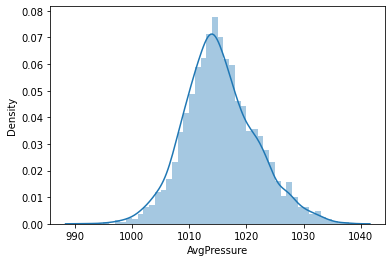

In [ ]:
sns.distplot(data1['AvgPressure']) #basınç sütununun histogramını çıkardık

In [ ]:
print("Skewness: %f" % data1['AvgPressure'].skew()) #ortalama basınç verilerinin çarpıklığını verir
print("Kurtosis: %f" % data1['AvgPressure'].kurt()) #ortalama basınç verilerinin basıklığını verir

Skewness: 0.298399
Kurtosis: 0.274757


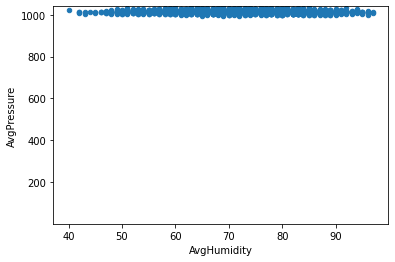

In [ ]:
var = 'AvgHumidity'
data5 = pd.concat([data1['AvgPressure'], data1[var]], axis=1) #ortalama basıncın, neme göre dağılım grafiğini verir
data5.plot.scatter(x='AvgHumidity', y='AvgPressure', ylim=(1));

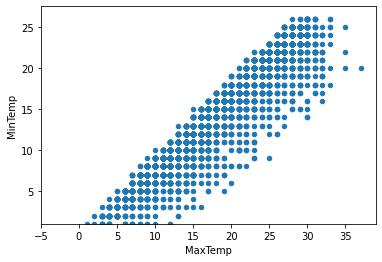

In [ ]:
var = 'MaxTemp'
data5 = pd.concat([data1['MinTemp'], data1[var]], axis=1) #min sıcaklığın, max sıcaklığa göre dağılım grafiğini verir
data5.plot.scatter(x='MaxTemp', y='MinTemp', ylim=(1));

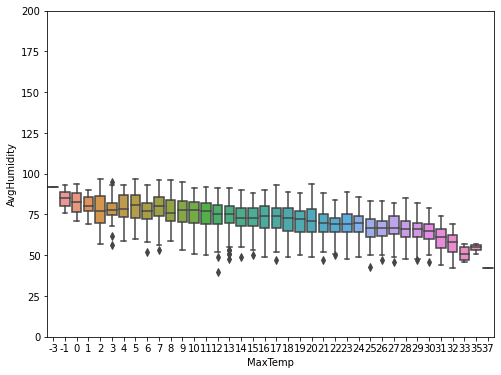

In [ ]:
var = 'MaxTemp'
data = pd.concat([data1['AvgHumidity'], data1[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="AvgHumidity", data=data) #max sıcaklığın ortalama neme göre ilişkisini verir
fig.axis(ymin=0, ymax=200);

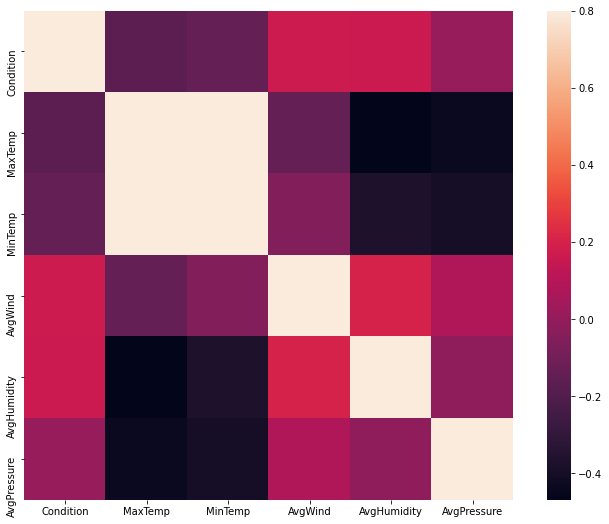

In [ ]:
corrmat = data1.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True); #data1'in korelasyon matrisi(heatmap stili)

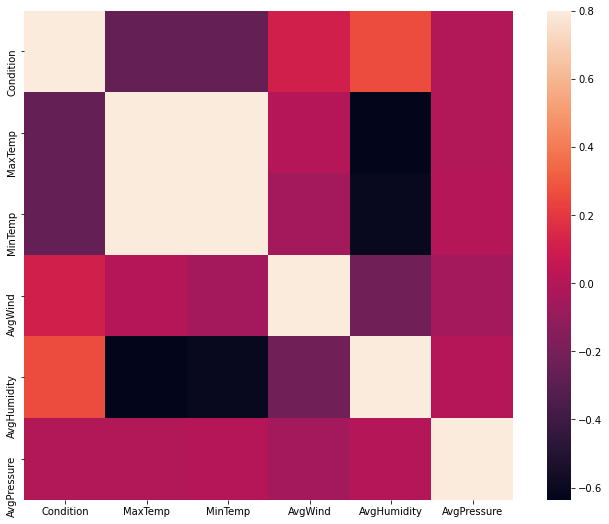

In [ ]:
corrmat = data2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

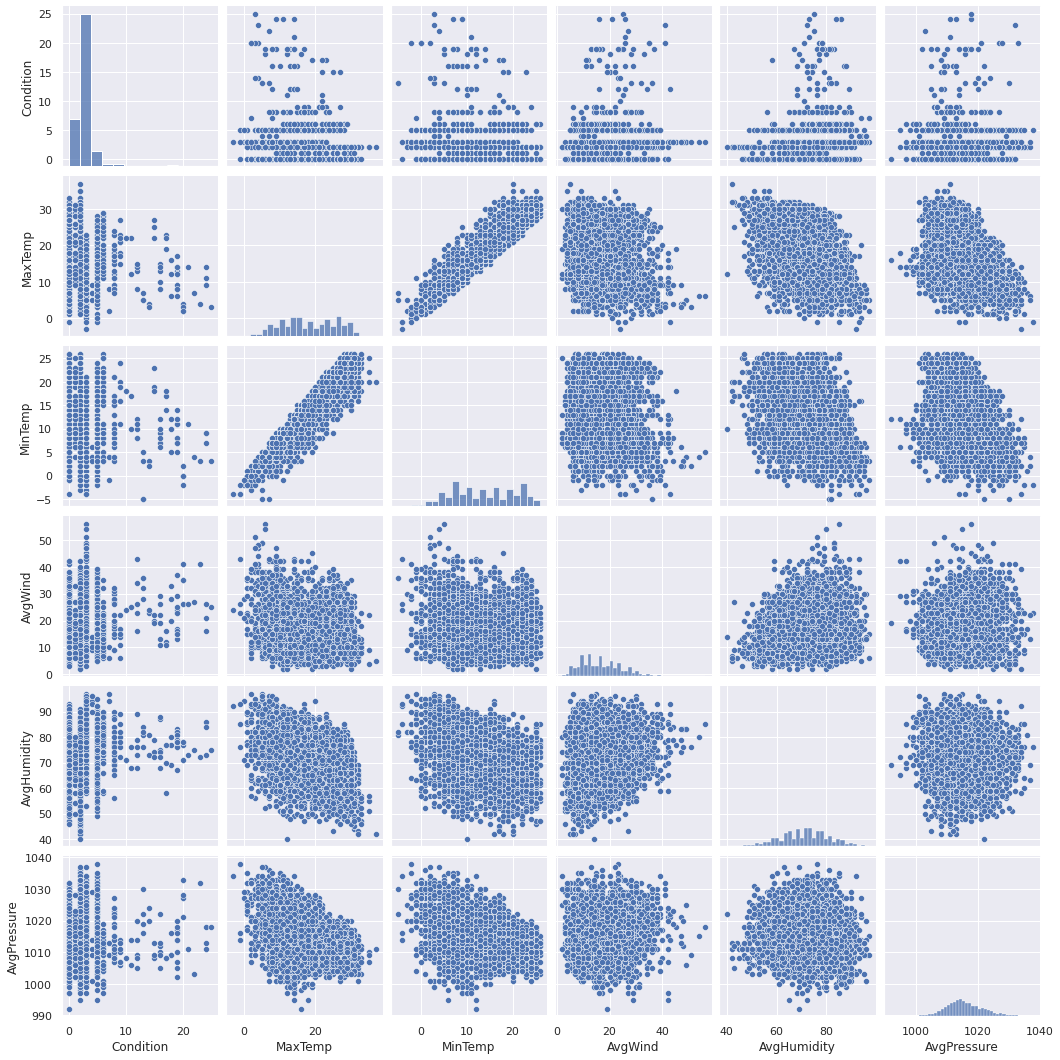

In [ ]:
sns.set()
cols = ['Condition', 'MaxTemp', 'MinTemp', 'AvgWind', 'AvgHumidity', 'AvgPressure']
sns.pairplot(data1[cols], height = 2.5)
plt.show(); #data1'in kategorilerinin birbirlerine göre dağılım grafiklerini verir

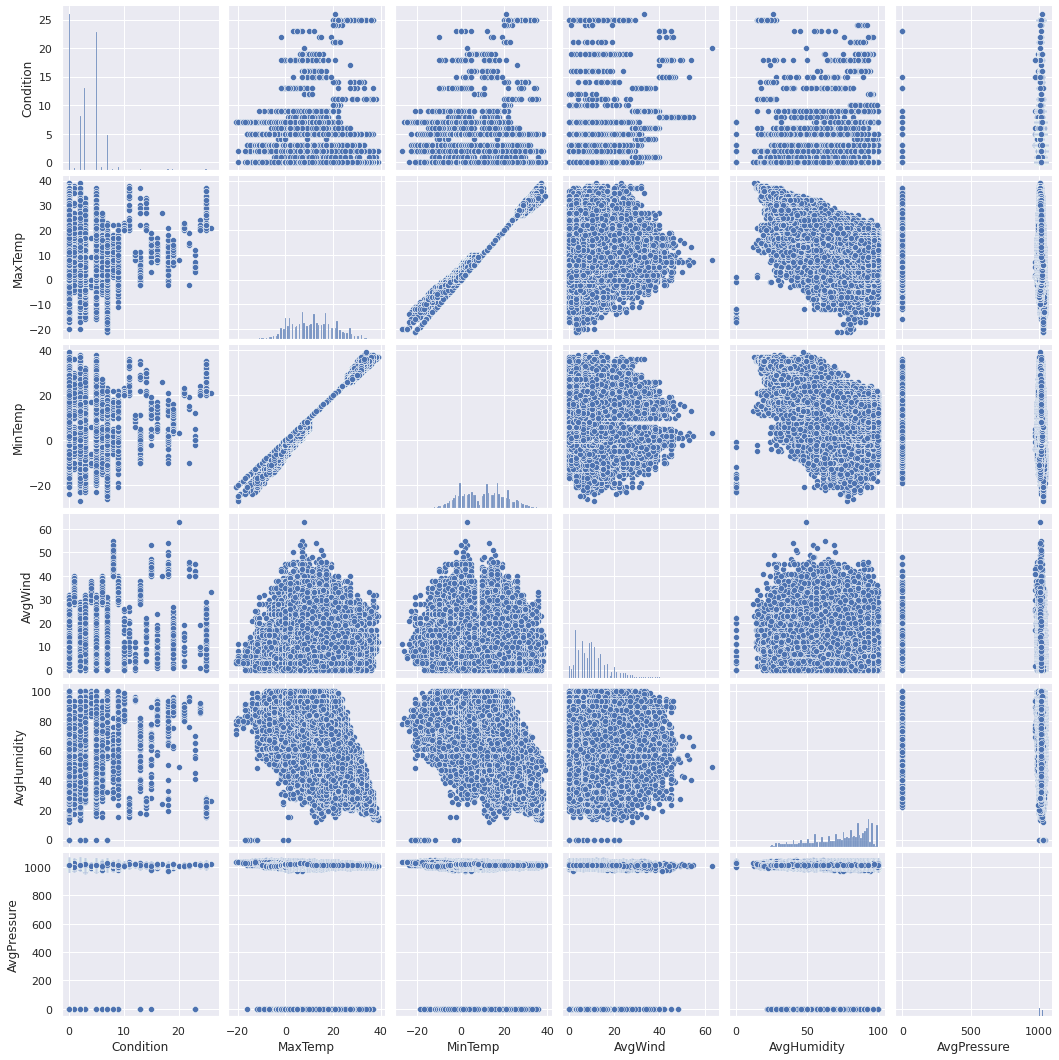

In [ ]:
sns.set()
cols = ['Condition', 'MaxTemp', 'MinTemp', 'AvgWind', 'AvgHumidity', 'AvgPressure']
sns.pairplot(data2[cols], height = 2.5)
plt.show(); #data2'in kategorilerinin birbirlerine göre dağılım grafiklerini verir

---


In [ ]:
dataset1=data1.values #data1 verilerini diziye atadık        #############################
dataset1

array([[Timestamp('2009-01-01 00:00:00'), 0, 5, ..., 10, 90, 1027],
       [Timestamp('2009-02-01 00:00:00'), 3, 4, ..., 12, 89, 1021],
       [Timestamp('2009-03-01 00:00:00'), 3, 5, ..., 16, 94, 1021],
       ...,
       [Timestamp('2019-08-31 00:00:00'), 1, 26, ..., 22, 63, 1015],
       [Timestamp('2019-01-09 00:00:00'), 0, 27, ..., 21, 66, 1011],
       [Timestamp('2019-02-09 00:00:00'), 0, 27, ..., 23, 66, 1012]],
      dtype=object)

In [ ]:
dataset2=data2.values #data2 verilerini diziye atadık   ######################
dataset2

array([['2006-04-01 00:00:00.000 +0200', 0, 9, ..., 14, 89, 1015],
       ['2006-04-01 01:00:00.000 +0200', 0, 9, ..., 14, 86, 1015],
       ['2006-04-01 02:00:00.000 +0200', 5, 9, ..., 3, 89, 1015],
       ...,
       ['2016-09-09 21:00:00.000 +0200', 0, 22, ..., 8, 56, 1015],
       ['2016-09-09 22:00:00.000 +0200', 0, 21, ..., 10, 60, 1015],
       ['2016-09-09 23:00:00.000 +0200', 0, 20, ..., 5, 61, 1016]],
      dtype=object)

In [ ]:
X1=dataset1[: , 2:6] #verilerin 2. ile 6. sütunu arasındaki verileri x vektörüne yerleştirdik 
Y1=dataset1[: , 0] #verilerin 0. sütunundaki verileri y vektörüne yerleştirdik
X2=dataset2[: , 2:6]
Y2=dataset2[: , 0]

In [ ]:
from sklearn import preprocessing
min_max_scaler1 = preprocessing.MinMaxScaler()
X_train_minmax1 = min_max_scaler1.fit_transform(X1)  
X_train_minmax1 #min max scaler ile vektörleştirdiğimiz verilerimizi 0 ile 1 arasındaki değer ölçüsüne dönüştürdük

array([[0.2       , 0.22580645, 0.14814815, 0.87719298],
       [0.175     , 0.19354839, 0.18518519, 0.85964912],
       [0.2       , 0.25806452, 0.25925926, 0.94736842],
       ...,
       [0.725     , 0.87096774, 0.37037037, 0.40350877],
       [0.75      , 0.87096774, 0.35185185, 0.45614035],
       [0.75      , 0.87096774, 0.38888889, 0.45614035]])

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_val_and_test,Y_train, Y_val_and_test=train_test_split(X_train_minmax1, Y1, test_size=0.4)


In [ ]:
X_val, X_test, Y_val, Y_test= train_test_split(X_val_and_test, Y_val_and_test, test_size=0.6)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape,Y_val.shape,Y_test.shape)

(2337, 4) (623, 4) (936, 4) (2337,) (623,) (936,)


In [ ]:
##from keras.model import Sequential
##from keras.layers import Dense
##from keras.optimizers import SGD
##from keras.optimizers import Adam
##from keras.optimizers import Adadelta
##from keras.optimizers import RMSprop
##from keras.optimizers import Adagrad


In [ ]:
min_max_scaler2 = preprocessing.MinMaxScaler()
X_train_minmax2 = min_max_scaler2.fit_transform(X2)
X_train_minmax2 #min max scaler ile vektörleştirdiğimiz verilerimizi 0 ile 1 arasındaki değer ölçüsüne dönüştürdük

array([[0.5       , 0.51515152, 0.22222222, 0.89      ],
       [0.5       , 0.51515152, 0.22222222, 0.86      ],
       [0.5       , 0.54545455, 0.04761905, 0.89      ],
       ...,
       [0.71666667, 0.74242424, 0.12698413, 0.56      ],
       [0.7       , 0.72727273, 0.15873016, 0.6       ],
       [0.68333333, 0.71212121, 0.07936508, 0.61      ]])

In [ ]:
#data1 kolerasyonu
data1.corr()

,Condition,MaxTemp,MinTemp,AvgWind,AvgHumidity,AvgPressure
Condition,1.000000,-0.162498,-0.137216,0.167104,0.160733,0.010543
MaxTemp,-0.162498,1.000000,0.946626,-0.140458,-0.469191,-0.436150
MinTemp,-0.137216,0.946626,1.000000,-0.047940,-0.371696,-0.399119
AvgWind,0.167104,-0.140458,-0.047940,1.000000,0.201916,0.076457
AvgHumidity,0.160733,-0.469191,-0.371696,0.201916,1.000000,-0.013038
AvgPressure,0.010543,-0.436150,-0.399119,0.076457,-0.013038,1.000000


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

<function matplotlib.pyplot.show>

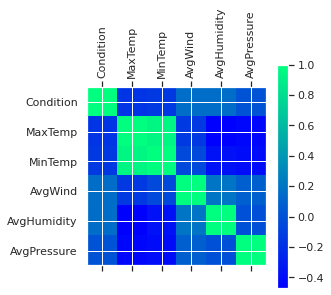

In [ ]:
#kolerasyon grafiği
plt.matshow(data1.corr(), cmap="winter")
data1columns = ['Condition','MaxTemp','MinTemp','AvgWind','AvgHumidity','AvgPressure']
plt.colorbar()
plt.xticks(list(range(len(data1columns))), data1columns, rotation="vertical")
plt.yticks(list(range(len(data1columns))), data1columns, rotation="horizontal")
plt.show

In [ ]:
#data2 kolerasyonu
data2.corr()

,Condition,MaxTemp,MinTemp,AvgWind,AvgHumidity,AvgPressure
Condition,1.000000,-0.263728,-0.262466,0.108752,0.263465,-0.006010
MaxTemp,-0.263728,1.000000,0.992779,0.005752,-0.635902,-0.005636
MinTemp,-0.262466,0.992779,1.000000,-0.056306,-0.607207,-0.000279
AvgWind,0.108752,0.005752,-0.056306,1.000000,-0.223425,-0.049298
AvgHumidity,0.263465,-0.635902,-0.607207,-0.223425,1.000000,0.005548
AvgPressure,-0.006010,-0.005636,-0.000279,-0.049298,0.005548,1.000000


<function matplotlib.pyplot.show>

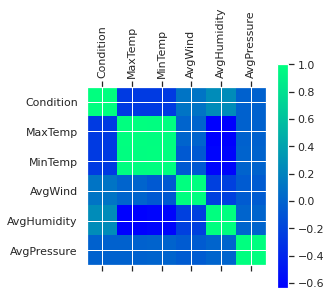

In [ ]:
#kolerasyon grafiği
plt.matshow(data2.corr(), cmap="winter")
data2columns = ['Condition','MaxTemp','MinTemp','AvgWind','AvgHumidity','AvgPressure']
plt.colorbar()
plt.xticks(list(range(len(data2columns))), data2columns, rotation="vertical")
plt.yticks(list(range(len(data2columns))), data2columns, rotation="horizontal")
plt.show

In [ ]:
data1['AvgTemp'] = data1[['MaxTemp', 'MinTemp']].mean(axis=1) #2 sütunun ortalamasını alarak yeni sütun ekledik 
data1.head(3)

,DateTime,Condition,MaxTemp,MinTemp,AvgWind,AvgHumidity,AvgPressure,AvgTemp
0,2009-01-01,0,5,2,10,90,1027,3.5
1,2009-02-01,3,4,1,12,89,1021,2.5
2,2009-03-01,3,5,3,16,94,1021,4.0


In [ ]:
data2['AvgTemp'] = data2[['MaxTemp', 'MinTemp']].mean(axis=1) #2 sütunun ortalamasını alarak yeni sütun ekledik 
data2.head(3)

,Formatted Date,Condition,MaxTemp,MinTemp,AvgWind,AvgHumidity,AvgPressure,AvgTemp
0,2006-04-01 00:00:00.000 +0200,0,9,7,14,89,1015,8.0
1,2006-04-01 01:00:00.000 +0200,0,9,7,14,86,1015,8.0
2,2006-04-01 02:00:00.000 +0200,5,9,9,3,89,1015,9.0


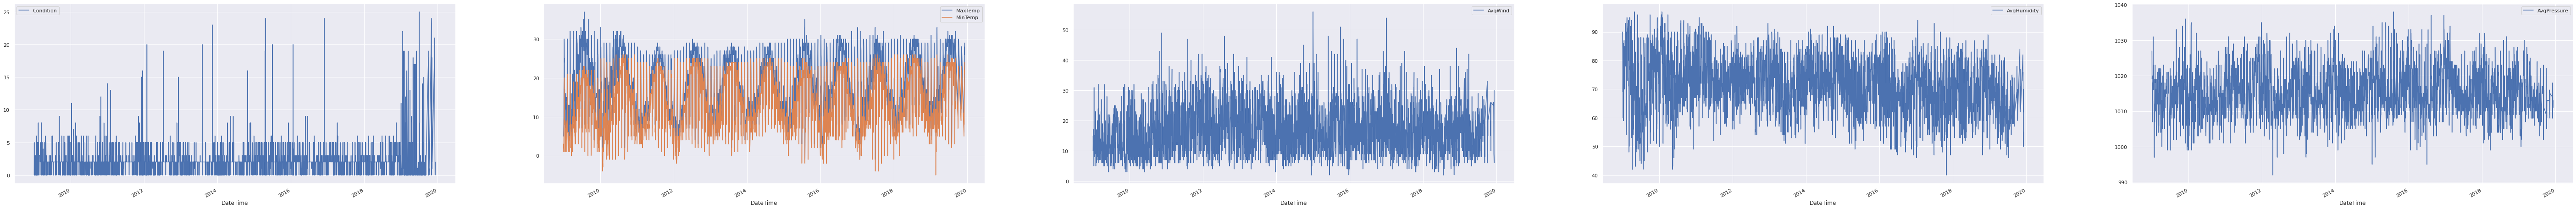

In [ ]:
fig, axs = plt.subplots(ncols=5, figsize=(100, 8))  #zamana göre öznitelik tablosu
data1.plot(x="DateTime", y=['Condition'], ax=axs[0])
data1.plot(x="DateTime", y=['MaxTemp','MinTemp'], ax=axs[1])
data1.plot(x="DateTime", y=['AvgWind'], ax=axs[2])
data1.plot(x="DateTime", y=['AvgHumidity'], ax=axs[3])
data1.plot(x="DateTime", y=['AvgPressure'],ax=axs[4])
plt.show()

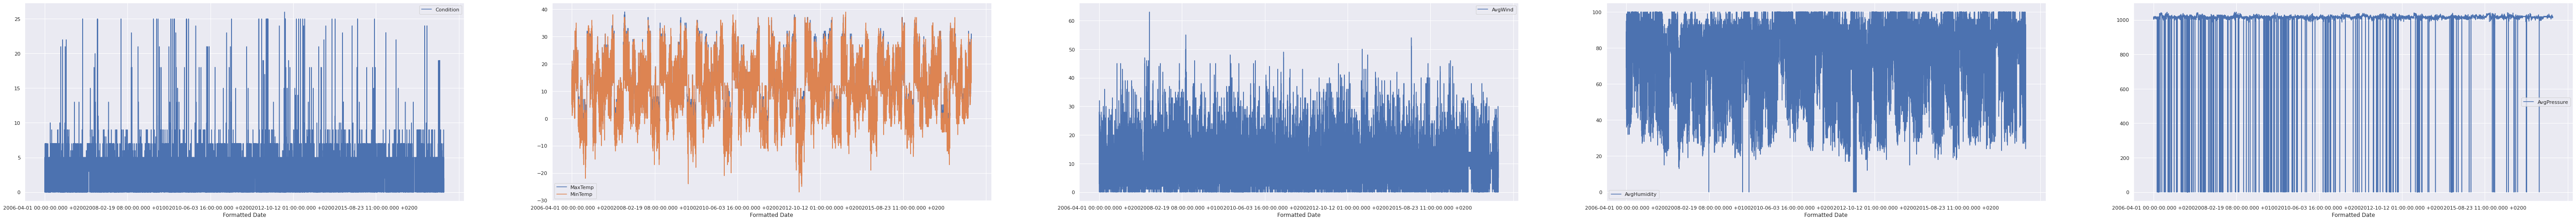

In [ ]:
fig, axs = plt.subplots(ncols=5, figsize=(100, 8)) #zamana göre öznitelik tablosu
data2.plot(x="Formatted Date", y=['Condition'], ax=axs[0])
data2.plot(x="Formatted Date", y=['MaxTemp','MinTemp'], ax=axs[1])
data2.plot(x="Formatted Date", y=['AvgWind'], ax=axs[2])
data2.plot(x="Formatted Date", y=['AvgHumidity'], ax=axs[3])
data2.plot(x="Formatted Date", y=['AvgPressure'],ax=axs[4])
plt.show()

In [ ]:
data1.drop(['DateTime', 'MaxTemp', 'MinTemp'], axis=1, inplace=True)
data2.drop(['Formatted Date', 'MaxTemp', 'MinTemp'], axis=1, inplace=True)


## **Yöntemler**

### **Klasik RNN**

In [ ]:
data1.head()

,Condition,AvgWind,AvgHumidity,AvgPressure,AvgTemp
0,0,10,90,1027,3.5
1,3,12,89,1021,2.5
2,3,16,94,1021,4.0
3,4,9,94,1014,4.0
4,3,15,97,1015,4.0


In [ ]:
X1=dataset1[: , 1:6] #verilerin 2. ile 6. sütunu arasındaki verileri x vektörüne yerleştirdik 
Y1=dataset1[: , 1] #verilerin 0. sütunundaki verileri y vektörüne yerleştirdik
X2=dataset2[: , 1:6]
Y2=dataset2[: , 1]

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
X_train = np.asarray(X1).astype('float32') 

In [ ]:
X2_train = np.asarray(X2).astype('float32')

In [ ]:
Y_train = np.asarray(Y1).astype(np.float32)

In [ ]:
Y2_train = np.asarray(Y2).astype(np.float32)

In [ ]:
X_train, X_val_and_test,Y_train, Y_val_and_test=train_test_split(X_train, Y_train, test_size=0.4)

In [ ]:
X2_train, X2_val_and_test,Y2_train, Y2_val_and_test=train_test_split(X2_train, Y2_train, test_size=0.4)

In [ ]:
X_val, X_test, Y_val, Y_test= train_test_split(X_val_and_test, Y_val_and_test, test_size=0.6)

In [ ]:
X2_val, X2_test, Y2_val, Y2_test= train_test_split(X2_val_and_test, Y2_val_and_test, test_size=0.6)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape,Y_val.shape,Y_test.shape)

(2337, 5) (623, 5) (936, 5) (2337,) (623,) (936,)


In [ ]:
print(X2_train.shape, X2_val.shape, X2_test.shape, Y2_train.shape,Y2_val.shape,Y2_test.shape)

(57871, 5) (15432, 5) (23150, 5) (57871,) (15432,) (23150,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.optimizers import Adadelta
from keras.optimizers import RMSprop
from keras.optimizers import Adagrad

In [ ]:
model=Sequential([
                Dense(32, activation='relu' , input_shape=(5,)),
                 Dense(32, activation='relu'),
                 Dense(1, activation='sigmoid'),
])

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist=model.fit(X_train, Y_train,
               batch_size=8, epochs=100,
               validation_data=(X_val,Y_val))

Epoch 1/100
293/293 [==============================] - 15s 4ms/step - loss: -310.1140 - accuracy: 0.0207 - val_loss: -4961.9287 - val_accuracy: 0.0161
Epoch 2/100
293/293 [==============================] - 1s 2ms/step - loss: -10626.2600 - accuracy: 0.0146 - val_loss: -45127.6953 - val_accuracy: 0.0161
Epoch 3/100
293/293 [==============================] - 1s 2ms/step - loss: -63705.6343 - accuracy: 0.0181 - val_loss: -155626.6875 - val_accuracy: 0.0161
Epoch 4/100
293/293 [==============================] - 0s 2ms/step - loss: -196442.7831 - accuracy: 0.0142 - val_loss: -352727.1562 - val_accuracy: 0.0161
Epoch 5/100
293/293 [==============================] - 1s 2ms/step - loss: -381262.5358 - accuracy: 0.0115 - val_loss: -657341.6250 - val_accuracy: 0.0161
Epoch 6/100
293/293 [==============================] - 1s 2ms/step - loss: -700137.4765 - accuracy: 0.0119 - val_loss: -1071312.6250 - val_accuracy: 0.0161
Epoch 7/100
293/293 [==============================] - 0s 2ms/step - loss: -

In [ ]:
model.evaluate(X_test,Y_test)[1]

30/30 [==============================] - 0s 1ms/step - loss: -1121327104.0000 - accuracy: 0.0118


0.01175213698297739

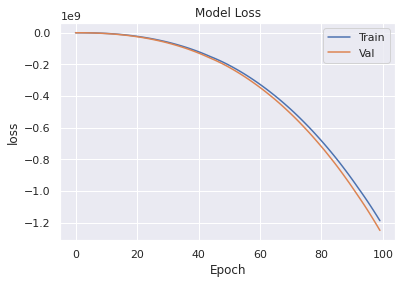

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

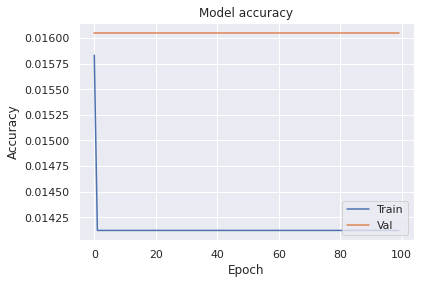

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val','test'], loc='lower right')
plt.show()

In [ ]:
model2=Sequential([
                Dense(32, activation='relu' , input_shape=(5,)),
                 Dense(32, activation='relu'),
                 Dense(1, activation='sigmoid'),
])

In [ ]:
model2.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                192       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist2=model2.fit(X2_train, Y2_train,
               batch_size=8, epochs=100,
               validation_data=(X2_val,Y2_val))

Epoch 1/100
7234/7234 [==============================] - 13s 2ms/step - loss: -5128694.7082 - accuracy: 0.0039 - val_loss: -64822128.0000 - val_accuracy: 0.0046
Epoch 2/100
7234/7234 [==============================] - 13s 2ms/step - loss: -119693062.8384 - accuracy: 0.0042 - val_loss: -367649760.0000 - val_accuracy: 0.0046
Epoch 3/100
7234/7234 [==============================] - 12s 2ms/step - loss: -506783448.7331 - accuracy: 0.0040 - val_loss: -1055198208.0000 - val_accuracy: 0.0046
Epoch 4/100
7234/7234 [==============================] - 13s 2ms/step - loss: -1316496621.8571 - accuracy: 0.0040 - val_loss: -2285812992.0000 - val_accuracy: 0.0046
Epoch 5/100
7234/7234 [==============================] - 11s 2ms/step - loss: -2719577268.1730 - accuracy: 0.0037 - val_loss: -4205971712.0000 - val_accuracy: 0.0046
Epoch 6/100
7234/7234 [==============================] - 12s 2ms/step - loss: -4841317454.7992 - accuracy: 0.0037 - val_loss: -6976437248.0000 - val_accuracy: 0.0046
Epoch 7/100


In [ ]:
#model.evaluate(X2_test,Y2_test)[1]

In [ ]:
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [ ]:
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val','test'], loc='lower right')
plt.show()

### **LTSM**


In [ ]:
#data1['AvgTemp'] = data1['AvgTemp'].astype(int)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#import keras
#import numpy

##from tensorflow.keras import datasets,layers,models
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import LSTM,Dropout,Dense,Embedding  #
from keras.layers.recurrent import GRU 
from keras.layers.recurrent import GRU 
##from tensorflow.keras.datasets import data3
##from tensorflow.keras.datasets import data2
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
##data1=tf.keras.datasets.data1
x=data1.drop('AvgTemp',axis=1)
y=data1['AvgTemp']

trainX,testX,trainy,testy=train_test_split(x,y,test_size=0.2)

x2=data2.drop('AvgTemp',axis=1)
y2=data2['AvgTemp']

trainX2,testX2,trainy2,testy2=train_test_split(x2,y2,test_size=0.2)
#X1=dataset1[: , 1:6] #verilerin 2. ile 6. sütunu arasındaki verileri x vektörüne yerleştirdik 
#Y1=dataset1[: , 1] #verilerin 0. sütunundaki verileri y vektörüne yerleştirdik
#X2=dataset2[: , 1:6]
#Y2=dataset2[: , 1]
train_size=int(len(data1)*0.7)
train = data1[0:train_size]
test=data1[train_size:len(data1)]

In [ ]:
data1.head()

,Condition,AvgWind,AvgHumidity,AvgPressure,AvgTemp
0,0,10,90,1027,3.5
1,3,12,89,1021,2.5
2,3,16,94,1021,4.0
3,4,9,94,1014,4.0
4,3,15,97,1015,4.0


In [ ]:
#x_train=pad_sequences(x_train,maxlen=100)
#x_test=pad_sequences(x_test,maxlen=100)
vocab_size=20000
embed_size=128
#features=5
#epochs=700
#output_size=2
model=Sequential()
#model.add(LSTM((1),batch_input_shape=(None,5,1),return_sequences=False))
#model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])
model.add(Embedding(vocab_size,embed_size,input_shape=(trainX.shape[1],)))
model.add(LSTM(units=60, activation='tanh'))
model.add(Dense(units=1, activation='sigmoid'))
adam=tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy',metrics=['accuracy'])

model2=Sequential()
#model.add(LSTM((1),batch_input_shape=(None,5,1),return_sequences=False))
#model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])
model2.add(Embedding(vocab_size,embed_size,input_shape=(trainX2.shape[1],)))
model2.add(LSTM(units=60, activation='tanh'))
model2.add(Dense(units=1, activation='sigmoid'))
model2.compile(optimizer=adam, loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 128)            2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 60)                45360     
_________________________________________________________________
dense (Dense)                (None, 1)                 61        
Total params: 2,605,421
Trainable params: 2,605,421
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 4, 128)            2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 60)                45360     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 61        
Total params: 2,605,421
Trainable params: 2,605,421
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(trainX,trainy,epochs=64,batch_size=256,validation_data=(testX,testy))

Epoch 1/64
13/13 [==============================] - 3s 92ms/step - loss: 0.5076 - accuracy: 0.0042 - val_loss: 0.2895 - val_accuracy: 0.0013
Epoch 2/64
13/13 [==============================] - 1s 46ms/step - loss: 0.1175 - accuracy: 0.0045 - val_loss: -0.1062 - val_accuracy: 0.0013
Epoch 3/64
13/13 [==============================] - 1s 48ms/step - loss: -0.3075 - accuracy: 0.0045 - val_loss: -0.5588 - val_accuracy: 0.0013
Epoch 4/64
13/13 [==============================] - 1s 46ms/step - loss: -0.8077 - accuracy: 0.0045 - val_loss: -1.1067 - val_accuracy: 0.0013
Epoch 5/64
13/13 [==============================] - 1s 46ms/step - loss: -1.4220 - accuracy: 0.0045 - val_loss: -1.7945 - val_accuracy: 0.0013
Epoch 6/64
13/13 [==============================] - 1s 48ms/step - loss: -2.1999 - accuracy: 0.0045 - val_loss: -2.6732 - val_accuracy: 0.0013
Epoch 7/64
13/13 [==============================] - 1s 47ms/step - loss: -3.2092 - accuracy: 0.0045 - val_loss: -3.8241 - val_accuracy: 0.0013
Ep

In [ ]:
#def evaluate_model(trainX, trainy, testX, testy):
# model = Sequential()
#	#model.add(LSTM(100, input_shape=(trainX.shape[1],)))
# model.add(Embedding(vocab_size,embed_size,input_shape=(trainX.shape[1],)))
# model.add(LSTM(units=60, activation='tanh'))
# model.add(Dense(units=1, activation='sigmoid'))

# adam=tf.keras.optimizers.Adam(learning_rate=0.0001)

# model.compile(optimizer=adam, loss='binary_crossentropy',metrics=['accuracy'])
	# fit network
# model.fit(trainX, trainy, epochs=15, batch_size=64, verbose=0)
	# evaluate model
# accuracy = model.evaluate(testX, testy, batch_size=64, verbose=0)
# return accuracy
history2 = model2.fit(trainX2,trainy2,epochs=64,batch_size=256,validation_data=(testX2,testy2))

Epoch 1/64
302/302 [==============================] - 16s 46ms/step - loss: -103.7288 - accuracy: 0.0266 - val_loss: -157.7352 - val_accuracy: 0.0283
Epoch 2/64
302/302 [==============================] - 14s 46ms/step - loss: -173.5304 - accuracy: 0.0266 - val_loss: -188.3459 - val_accuracy: 0.0283
Epoch 3/64
302/302 [==============================] - 14s 45ms/step - loss: -200.3365 - accuracy: 0.0266 - val_loss: -212.7174 - val_accuracy: 0.0283
Epoch 4/64
302/302 [==============================] - 14s 45ms/step - loss: -223.3294 - accuracy: 0.0266 - val_loss: -234.7197 - val_accuracy: 0.0283
Epoch 5/64
302/302 [==============================] - 14s 45ms/step - loss: -244.6426 - accuracy: 0.0266 - val_loss: -255.5320 - val_accuracy: 0.0283
Epoch 6/64
302/302 [==============================] - 14s 45ms/step - loss: -265.0227 - accuracy: 0.0266 - val_loss: -275.5908 - val_accuracy: 0.0283
Epoch 7/64
302/302 [==============================] - 14s 45ms/step - loss: -284.8046 - accuracy: 0.

In [ ]:
#def summarize_results(scores):
# print(scores)
# m, s = mean(scores), std(scores)
# print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

In [ ]:
def plot_learningCurve(history, epochs):
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()
  
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

In [ ]:
#def run_experiment(repeats=10):
# load data
# scores = list()
# for r in range(repeats):
#  score = evaluate_model(trainX, trainy, testX, testy)
#  score = score * 100
#  print('>#%d: %.3f' % (r+1, score[0]))
#  scores.append(score)
	# summarize results
# summarize_results(scores)

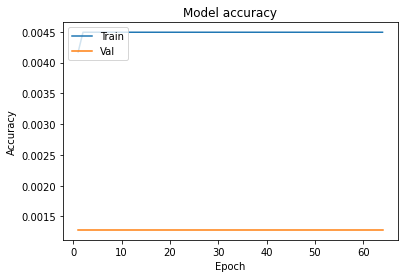

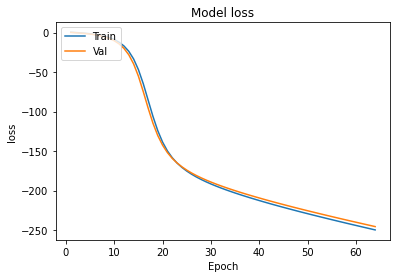

In [ ]:
#run_experiment()
plot_learningCurve(history, 64)

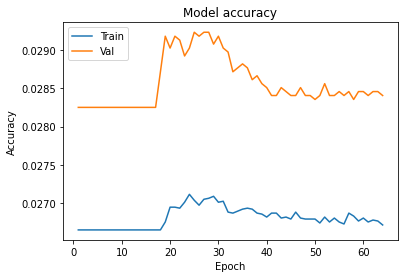

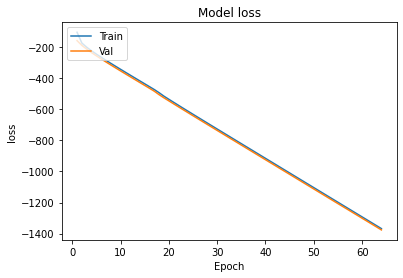

In [ ]:
plot_learningCurve(history2, 64)

### **GRU**

In [ ]:
model=Sequential() #model oluşturduk
#model.add(LSTM((1),batch_input_shape=(None,5,1),return_sequences=False))
#model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])
model.add(Embedding(vocab_size,embed_size,input_shape=(trainX.shape[1],)))
model.add(GRU(units=60, activation='tanh'))
model.add(Dense(units=1, activation='sigmoid'))
adam=tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy',metrics=['accuracy'])

model2=Sequential()
#model.add(LSTM((1),batch_input_shape=(None,5,1),return_sequences=False))
#model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])
model2.add(Embedding(vocab_size,embed_size,input_shape=(trainX2.shape[1],)))
model2.add(GRU(units=60, activation='tanh'))
model2.add(Dense(units=1, activation='sigmoid'))
model2.compile(optimizer=adam, loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
model2.summary()

In [ ]:
history = model.fit(trainX,trainy,epochs=64,batch_size=256,validation_data=(testX,testy))

Epoch 1/64
13/13 [==============================] - 4s 76ms/step - loss: 0.4473 - accuracy: 0.0032 - val_loss: 0.1575 - val_accuracy: 0.0013
Epoch 2/64
13/13 [==============================] - 1s 46ms/step - loss: -0.1136 - accuracy: 0.0045 - val_loss: -0.4132 - val_accuracy: 0.0013
Epoch 3/64
13/13 [==============================] - 1s 44ms/step - loss: -0.7354 - accuracy: 0.0045 - val_loss: -1.0686 - val_accuracy: 0.0013
Epoch 4/64
13/13 [==============================] - 1s 45ms/step - loss: -1.4628 - accuracy: 0.0045 - val_loss: -1.8606 - val_accuracy: 0.0013
Epoch 5/64
13/13 [==============================] - 1s 45ms/step - loss: -2.3550 - accuracy: 0.0045 - val_loss: -2.8356 - val_accuracy: 0.0013
Epoch 6/64
13/13 [==============================] - 1s 46ms/step - loss: -3.4663 - accuracy: 0.0045 - val_loss: -4.0774 - val_accuracy: 0.0013
Epoch 7/64
13/13 [==============================] - 1s 46ms/step - loss: -4.8728 - accuracy: 0.0045 - val_loss: -5.6502 - val_accuracy: 0.0013
E

In [ ]:
history2 = model2.fit(trainX2,trainy2,epochs=64,batch_size=256,validation_data=(testX2,testy2))

Epoch 1/64
302/302 [==============================] - 16s 46ms/step - loss: -102.7611 - accuracy: 0.0266 - val_loss: -152.7912 - val_accuracy: 0.0283
Epoch 2/64
302/302 [==============================] - 13s 44ms/step - loss: -167.6093 - accuracy: 0.0266 - val_loss: -181.8098 - val_accuracy: 0.0283
Epoch 3/64
302/302 [==============================] - 13s 44ms/step - loss: -193.4851 - accuracy: 0.0266 - val_loss: -205.5952 - val_accuracy: 0.0283
Epoch 4/64
302/302 [==============================] - 13s 45ms/step - loss: -216.0545 - accuracy: 0.0266 - val_loss: -227.2859 - val_accuracy: 0.0283
Epoch 5/64
302/302 [==============================] - 13s 44ms/step - loss: -237.0961 - accuracy: 0.0266 - val_loss: -247.8628 - val_accuracy: 0.0283
Epoch 6/64
302/302 [==============================] - 13s 44ms/step - loss: -257.2906 - accuracy: 0.0266 - val_loss: -267.7849 - val_accuracy: 0.0283
Epoch 7/64
302/302 [==============================] - 13s 44ms/step - loss: -276.9464 - accuracy: 0.

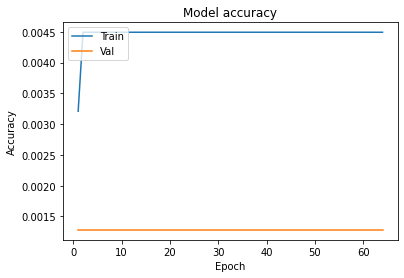

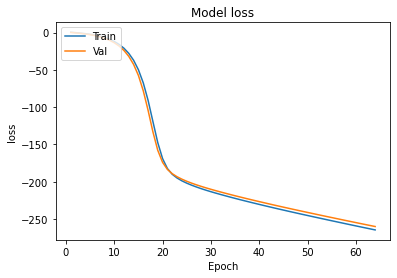

In [ ]:
plot_learningCurve(history, 64)

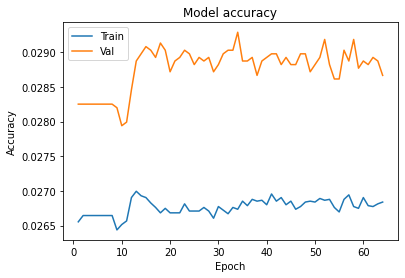

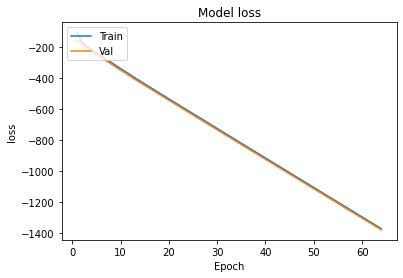

In [ ]:
plot_learningCurve(history2, 64)

### **CNN**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding
from keras.layers.recurrent import GRU 

from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
x=data1.drop('AvgTemp',axis=1)
y=data1['AvgTemp']

trainX,testX,trainy,testy=train_test_split(x,y,test_size=0.2)

x2=data2.drop('AvgTemp',axis=1)
y2=data2['AvgTemp']

trainX2,testX2,trainy2,testy2=train_test_split(x2,y2,test_size=0.2)
#X1=dataset1[: , 1:6] #verilerin 2. ile 6. sütunu arasındaki verileri x vektörüne yerleştirdik 
#Y1=dataset1[: , 1] #verilerin 0. sütunundaki verileri y vektörüne yerleştirdik
#X2=dataset2[: , 1:6]
#Y2=dataset2[: , 1]
train_size=int(len(data1)*0.7)
train = data1[0:train_size]
test=data1[train_size:len(data1)]

In [ ]:
#X_train=pad_sequences(trainX, maxlen=100)
#X_test=pad_sequences(X_test, maxlen=100)

In [ ]:
vocab_size=20000
embed_size=128

In [ ]:
model=Sequential()
model.add(Embedding(vocab_size,embed_size,input_shape=(trainX.shape[1],)))
model.add(Conv1D(filters=32,kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32,kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation='sigmoid'))
adam=tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy',metrics=['accuracy'])

model2=Sequential()
model2.add(Embedding(vocab_size,embed_size,input_shape=(trainX.shape[1],)))
model2.add(Conv1D(filters=32,kernel_size=3, padding='same', activation='relu'))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Conv1D(filters=32,kernel_size=3, padding='same', activation='relu'))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Dropout(0.3))
model2.add(Dense(units=1, activation='sigmoid'))
model2.compile(optimizer=adam, loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(trainX, trainy, epochs=32, batch_size=128, validation_data=(testX,testy))

Epoch 1/32
25/25 [==============================] - 2s 49ms/step - loss: 0.5065 - accuracy: 0.0042 - val_loss: 0.0108 - val_accuracy: 0.0026
Epoch 2/32
25/25 [==============================] - 1s 37ms/step - loss: -0.4677 - accuracy: 0.0042 - val_loss: -0.9312 - val_accuracy: 0.0026
Epoch 3/32
25/25 [==============================] - 1s 38ms/step - loss: -1.5162 - accuracy: 0.0042 - val_loss: -2.0813 - val_accuracy: 0.0026
Epoch 4/32
25/25 [==============================] - 1s 36ms/step - loss: -2.8630 - accuracy: 0.0042 - val_loss: -3.6244 - val_accuracy: 0.0026
Epoch 5/32
25/25 [==============================] - 1s 37ms/step - loss: -4.7631 - accuracy: 0.0042 - val_loss: -5.8094 - val_accuracy: 0.0026
Epoch 6/32
25/25 [==============================] - 1s 37ms/step - loss: -7.3967 - accuracy: 0.0042 - val_loss: -8.9582 - val_accuracy: 0.0026
Epoch 7/32
25/25 [==============================] - 1s 38ms/step - loss: -11.1297 - accuracy: 0.0042 - val_loss: -13.4685 - val_accuracy: 0.0026

In [ ]:
history2=model.fit(trainX2, trainy2, epochs=32, batch_size=128, validation_data=(testX2,testy2))

Epoch 1/32
603/603 [==============================] - 22s 37ms/step - loss: -152.6169 - accuracy: 0.0270 - val_loss: -153.0086 - val_accuracy: 0.0267
Epoch 2/32
603/603 [==============================] - 22s 37ms/step - loss: -152.9527 - accuracy: 0.0270 - val_loss: -153.0086 - val_accuracy: 0.0267
Epoch 3/32
603/603 [==============================] - 22s 37ms/step - loss: -153.0344 - accuracy: 0.0270 - val_loss: -153.0105 - val_accuracy: 0.0267
Epoch 4/32
603/603 [==============================] - 22s 37ms/step - loss: -153.0895 - accuracy: 0.0270 - val_loss: -153.0194 - val_accuracy: 0.0267
Epoch 5/32
603/603 [==============================] - 22s 36ms/step - loss: -153.1897 - accuracy: 0.0270 - val_loss: -153.2028 - val_accuracy: 0.0267
Epoch 6/32
603/603 [==============================] - 22s 36ms/step - loss: -153.5068 - accuracy: 0.0271 - val_loss: -153.6990 - val_accuracy: 0.0268
Epoch 7/32
603/603 [==============================] - 22s 36ms/step - loss: -154.3262 - accuracy: 0.

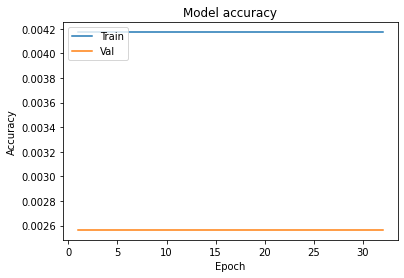

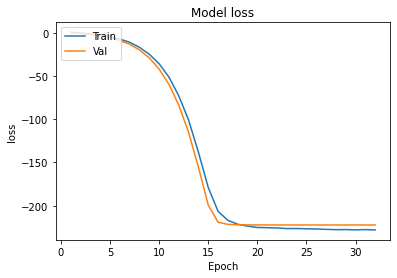

In [ ]:
#sc = preprocessing.MinMaxScaler(feature_range = (0,1))
#y_predict = model.predict(testX)
#y_predicted_descaled = sc.inverse_transform(trainy)
#y_test_descaled = sc.inverse_transform(testy)
#y_pred = y_predicted.ravel()
#y_pred = [round(yx, 2) for yx in y_pred]
# y_tested = y_test.ravel()
plot_learningCurve(history, 32)

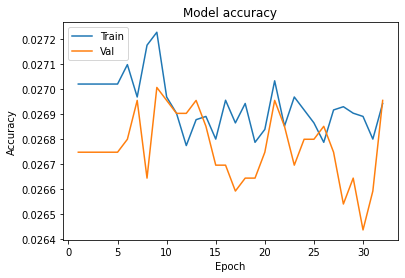

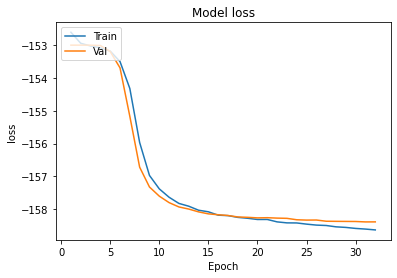

In [ ]:
plot_learningCurve(history2, 32)